In [82]:
import scipy
import numpy as np
import pandas as pd
import sweetviz as sw
import tqdm as notebook_tqdm
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
import seaborn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso

# myntra202305041052.csv

https://www.kaggle.com/datasets/ronakbokaria/myntra-products-dataset?select=myntra202305041052.csv

In [91]:
m = pd.read_csv('./datasets/myntra202305041052.csv').dropna()

In [92]:
m.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


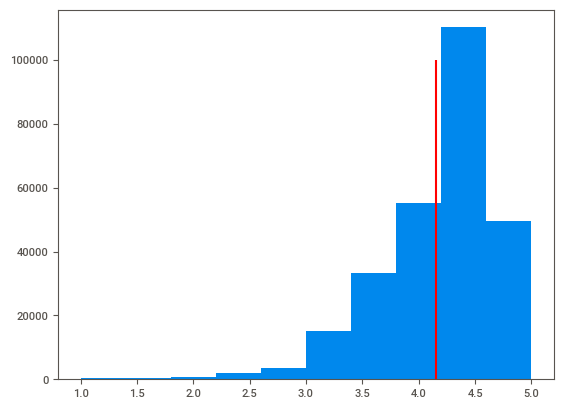

In [100]:
plt.hist(m['rating'][m['rating'] > 0])
plt.vlines(np.mean(m['rating'][m['rating'] > 0]), ymin=10, ymax=100000, colors='r')

In [106]:
np.mean(m['rating'][m['rating'] > 0])

4.155779163878238

# googleplaystore.csv

https://www.kaggle.com/datasets/whenamancodes/play-store-apps?select=googleplaystore.csv

In [107]:
gpm = pd.read_csv('./datasets/googleplaystore.csv').dropna()
gpm = gpm.loc[gpm['Installs'] != 'Free']
gpm.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [108]:
gps_t = pd.DataFrame()
gps_t['Rating'] = gpm['Rating']
gps_t['Reviews'] = gpm['Reviews'].apply(int)
gps_t['Installs'] = gpm['Installs'].map(lambda a: int(a.replace('+', '').replace(',', '')))
gps_t = pd.DataFrame(StandardScaler().fit_transform(gps_t), columns=gps_t.columns)
gps_t.head()

,Rating,Reviews,Installs
0,-0.178244,-0.163511,-0.196126
1,-0.566416,-0.163254,-0.190757
2,0.986272,-0.135735,-0.141448
3,0.598100,-0.094991,0.351641
4,0.209928,-0.163254,-0.195140


In [105]:
np.mean(gpm['Rating'])

4.191837606837606

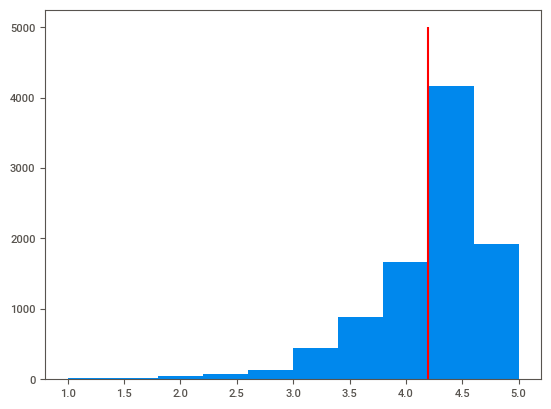

In [104]:
plt.hist(gpm['Rating'])
plt.vlines(np.mean(gpm['Rating'][gpm['Rating'] > 0]), ymin=10, ymax=5000, colors='r')

<Axes: >

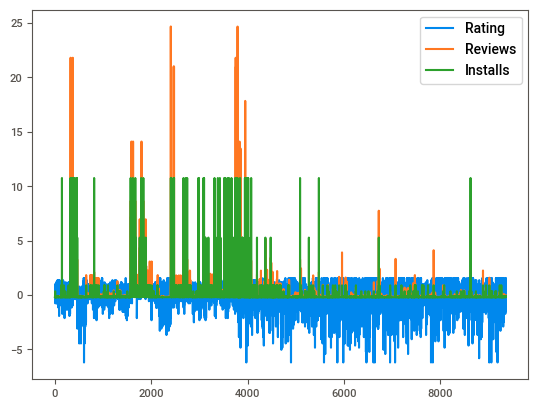

In [109]:
gps_t.plot()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



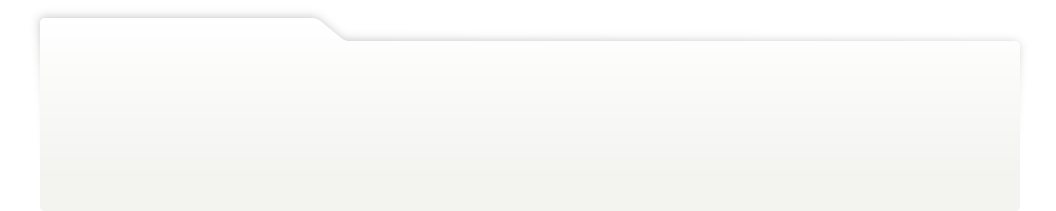
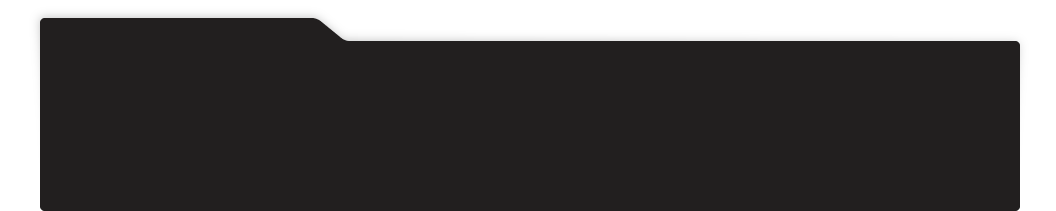
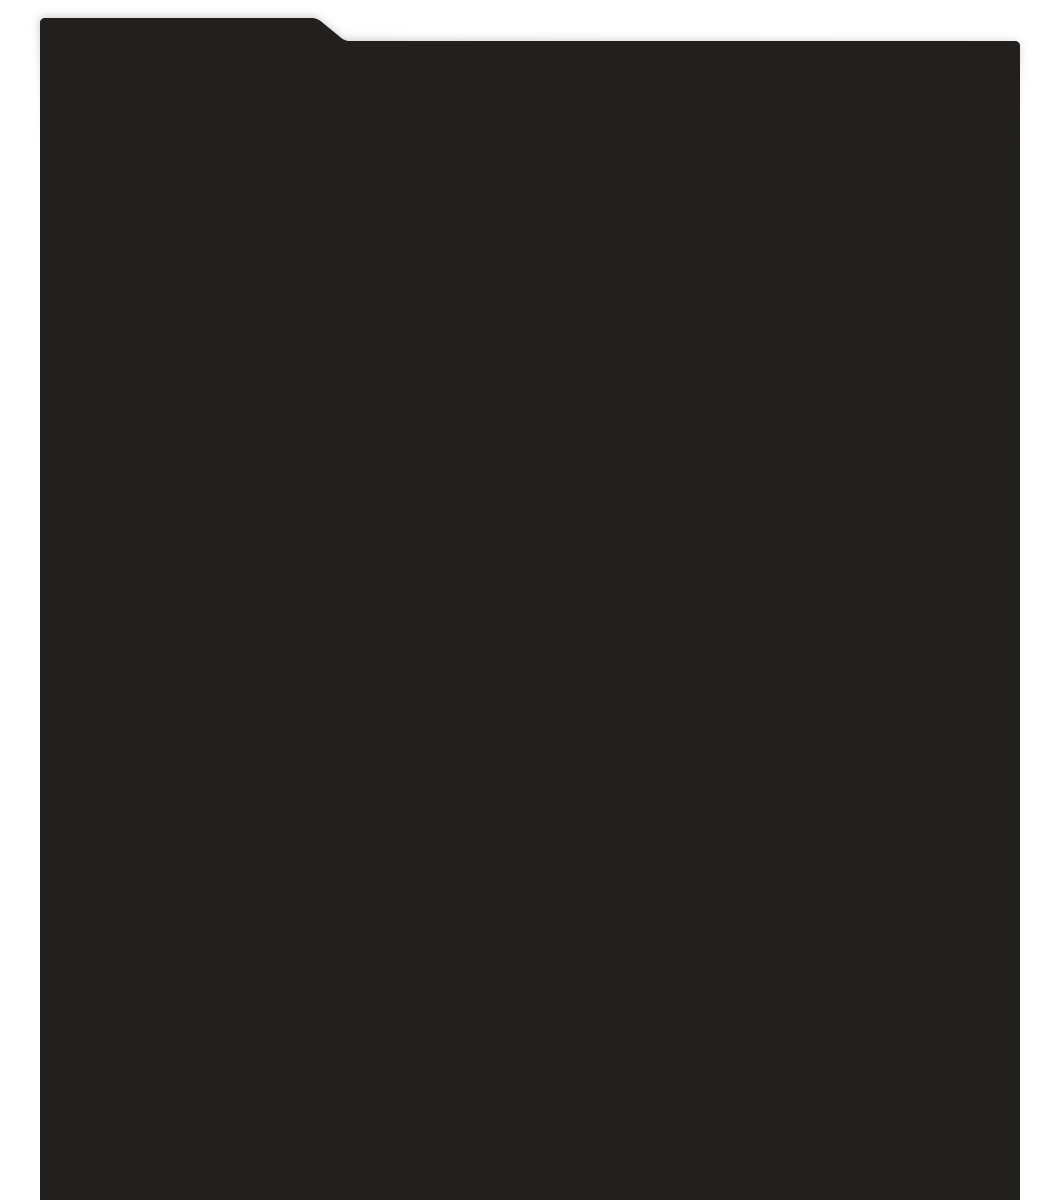
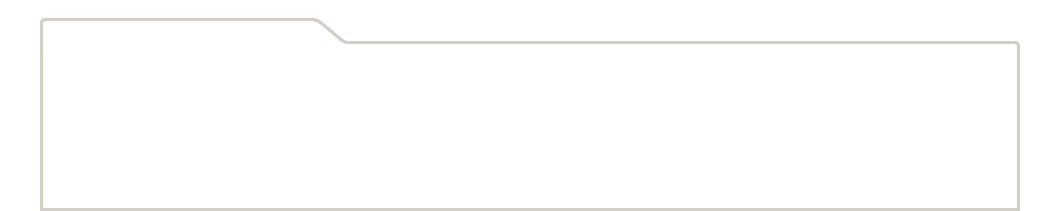
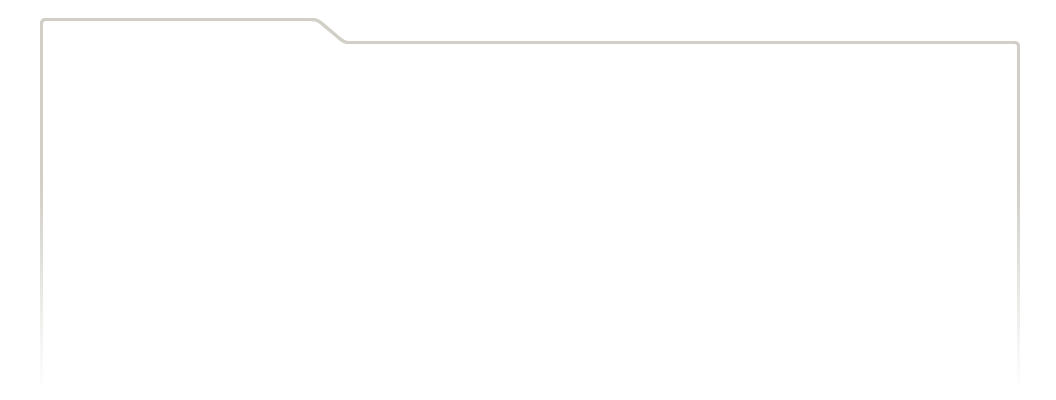
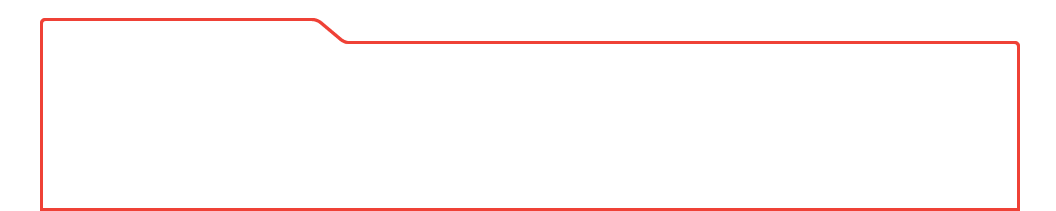
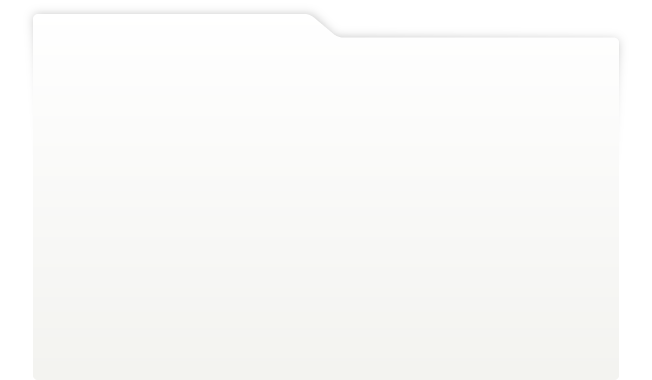
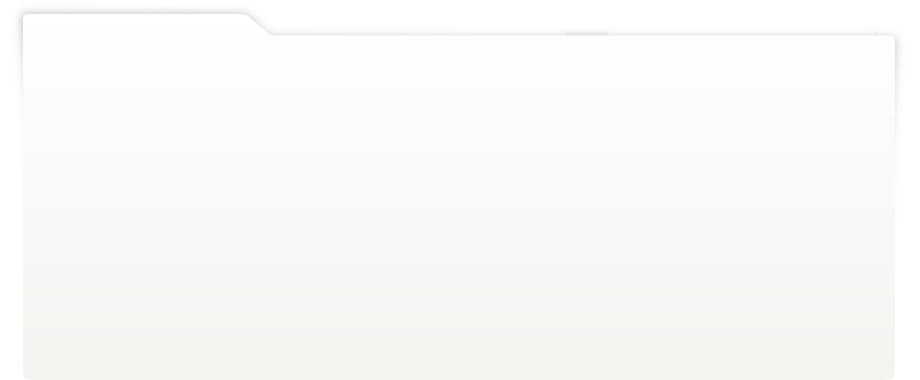
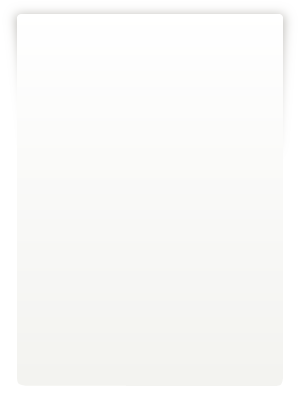
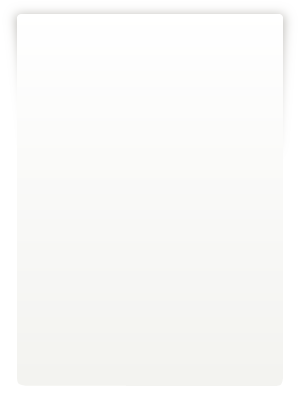
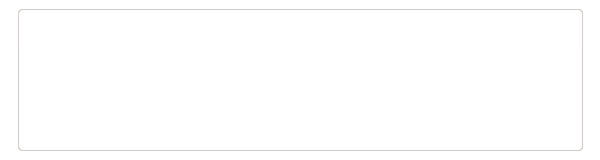
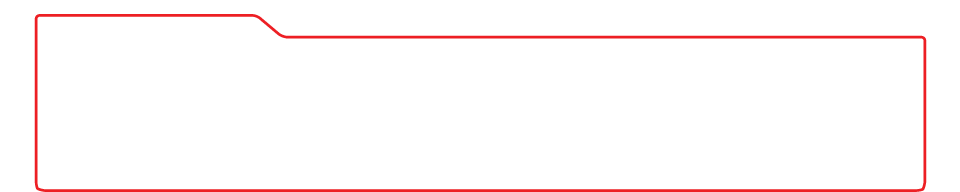
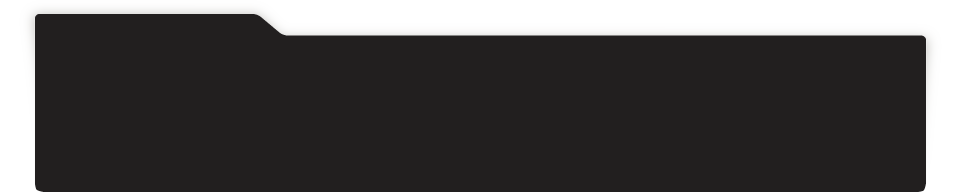
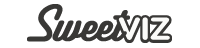
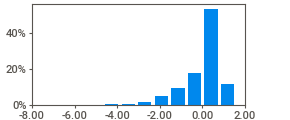
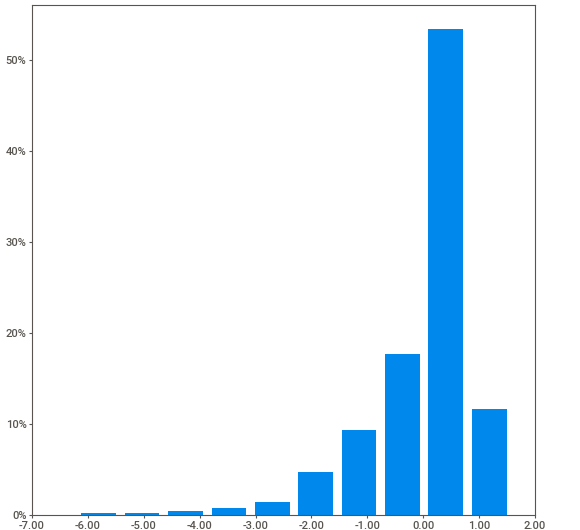
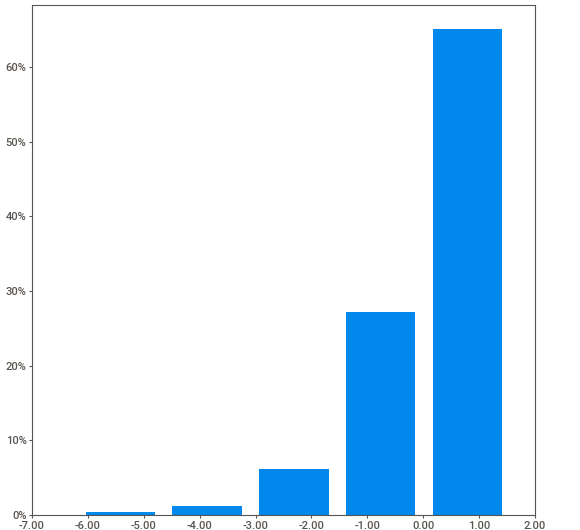
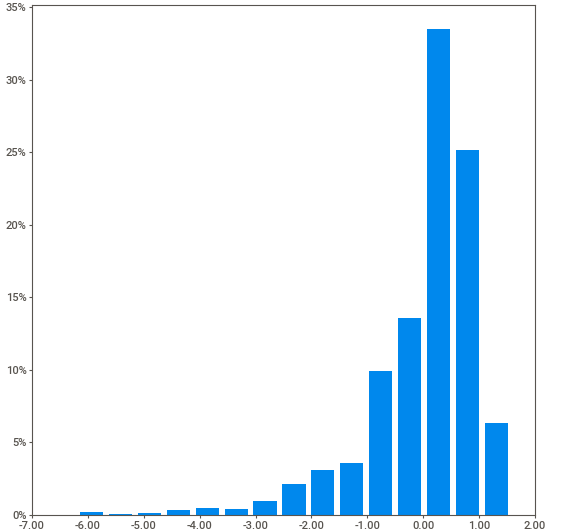
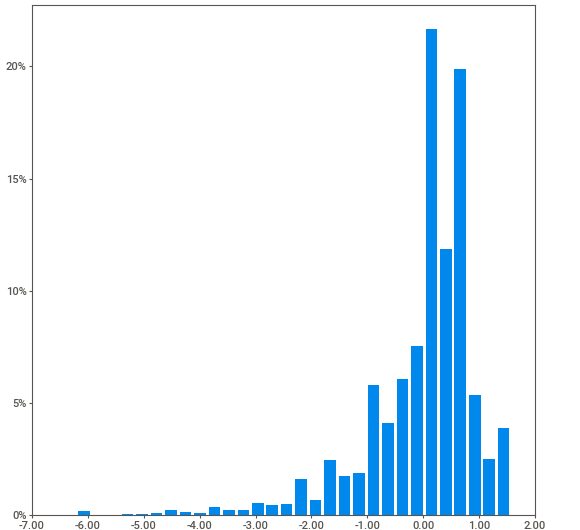
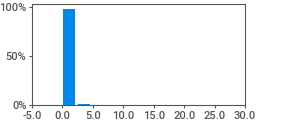
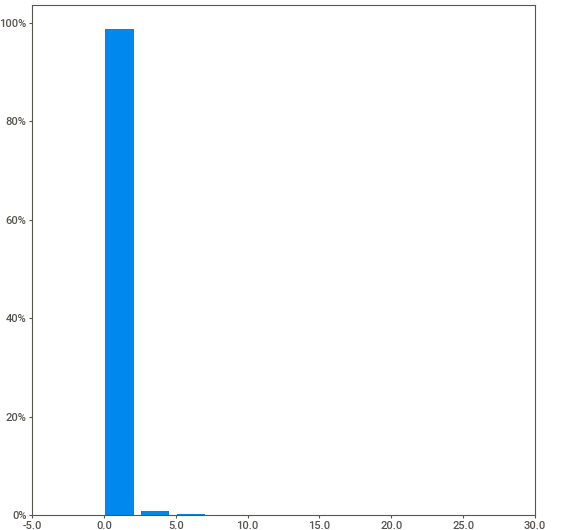
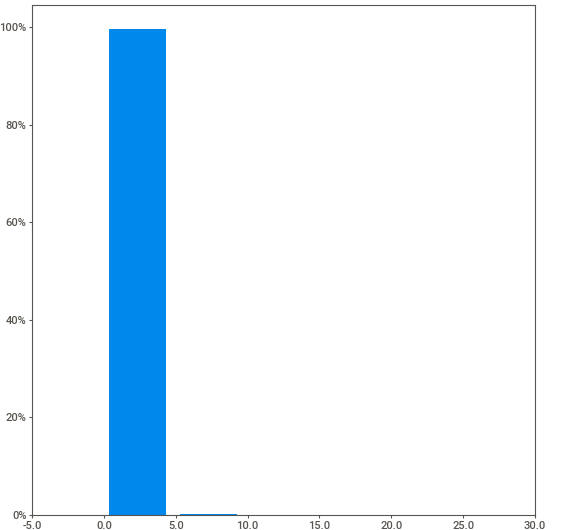
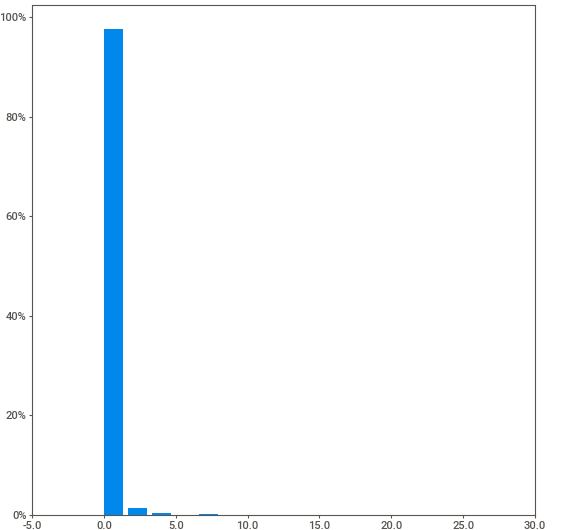
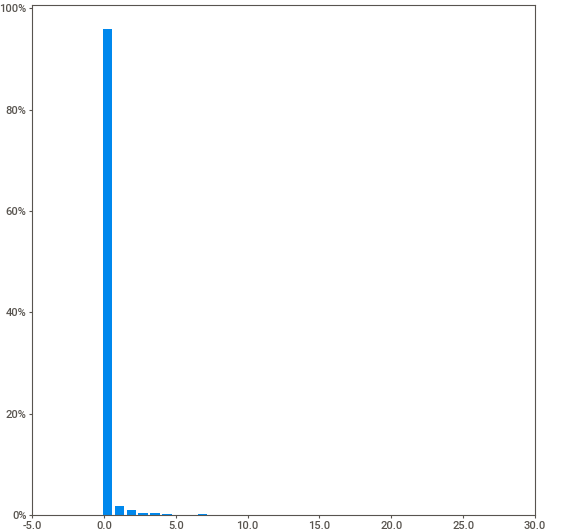
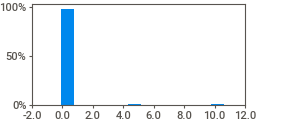
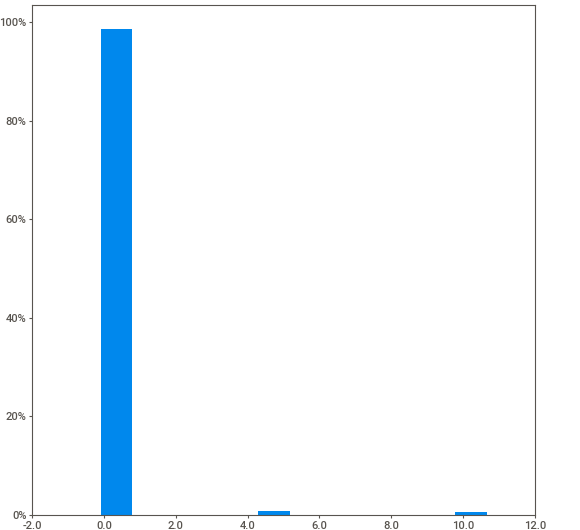
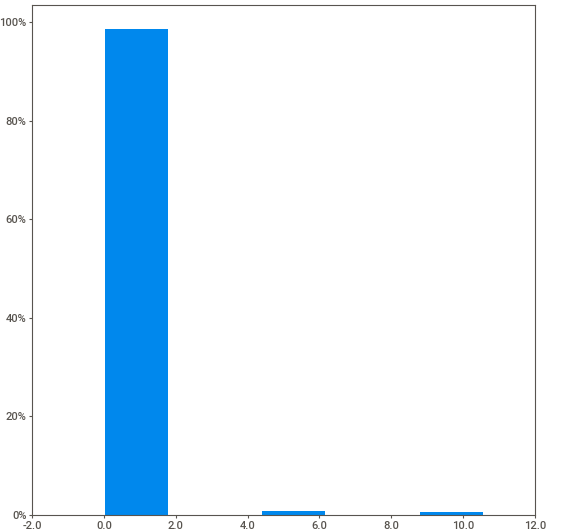
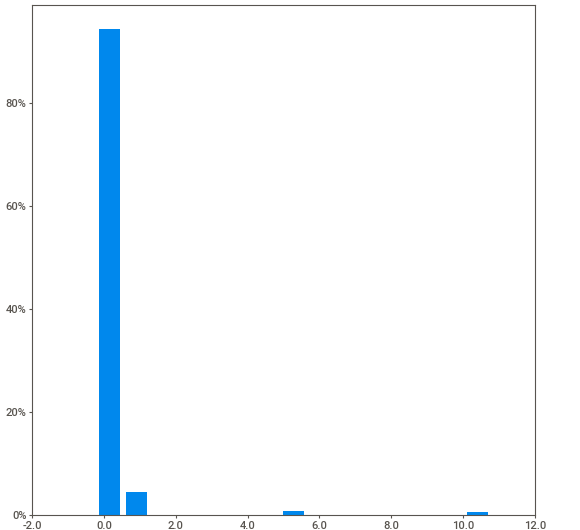
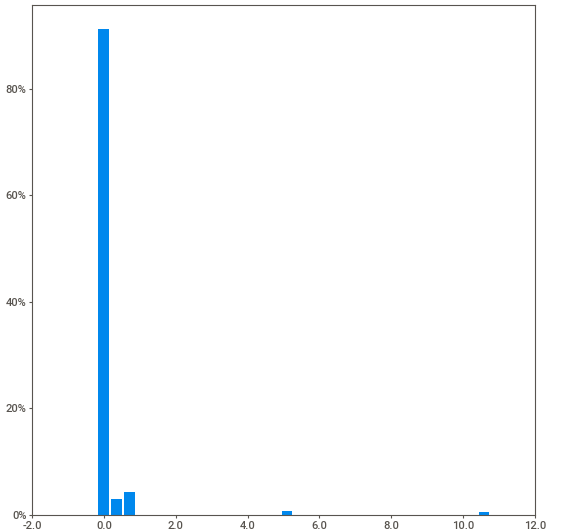
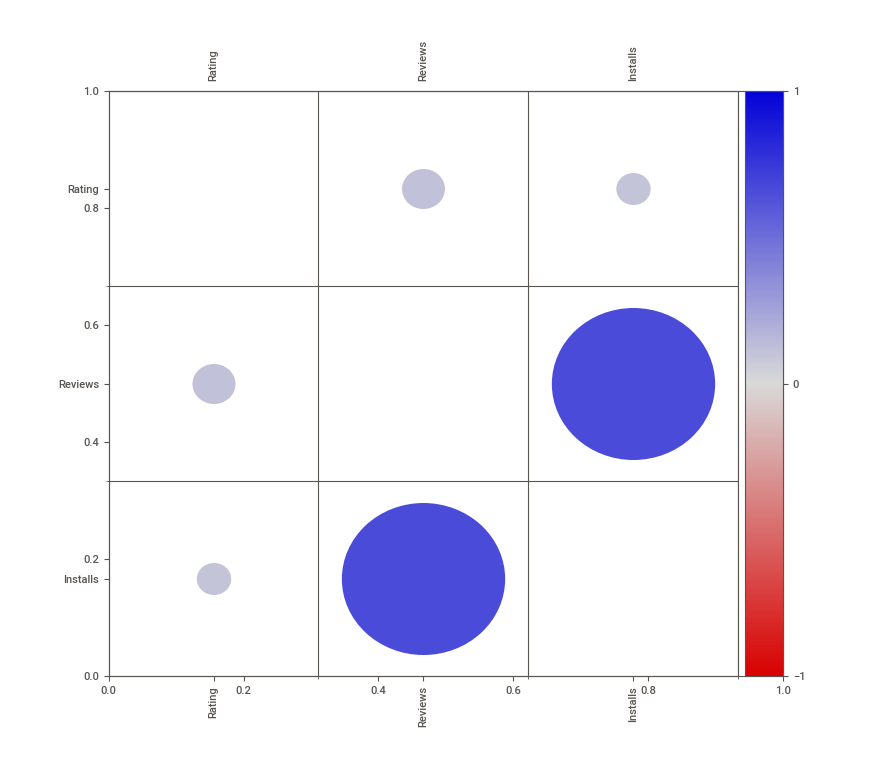
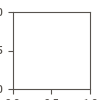

In [89]:
sw.analyze(gps_t).show_notebook()

<Axes: >

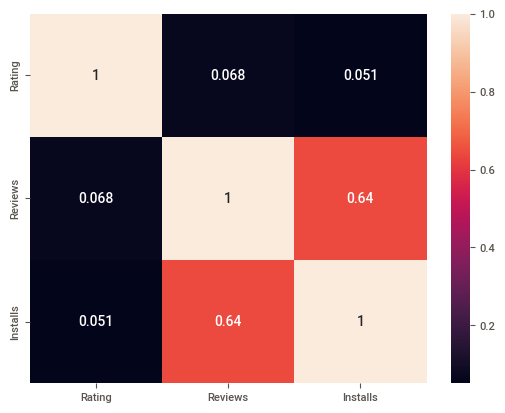

In [90]:
seaborn.heatmap(gps_t.corr(), annot=True)

# BankCustomerData
https://www.kaggle.com/datasets/kidoen/bank-customers-data

In [4]:
bcd = pd.read_csv('./datasets/BankCustomerData.csv')
bcd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Feature: job                                 |█         | [ 11%]   00:00 -> (00:04 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: marital                             |█▋        | [ 17%]   00:00 -> (00:03 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: education                           |██▏       | [ 22%]   00:00 -> (00:02 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i


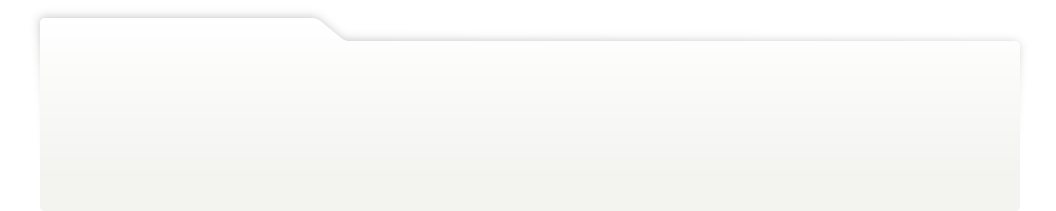
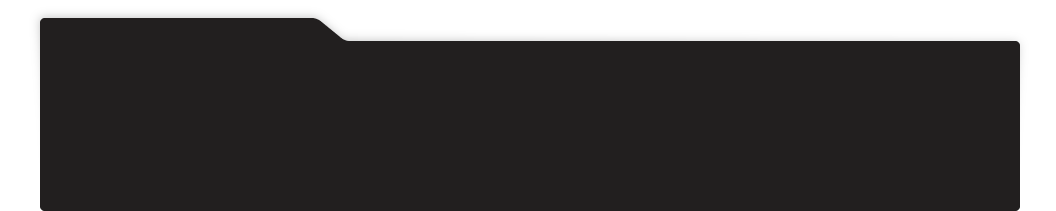
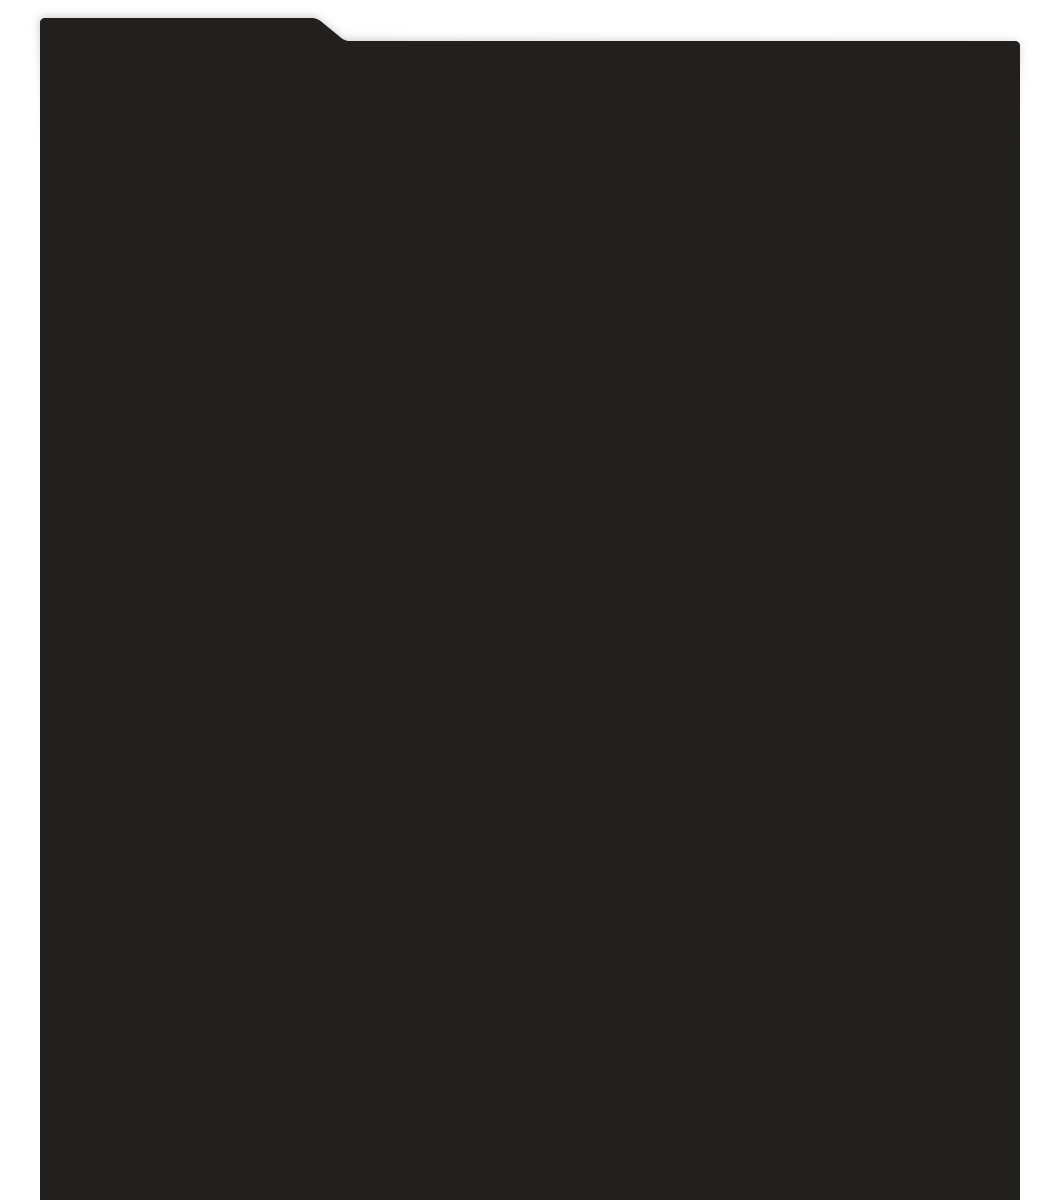
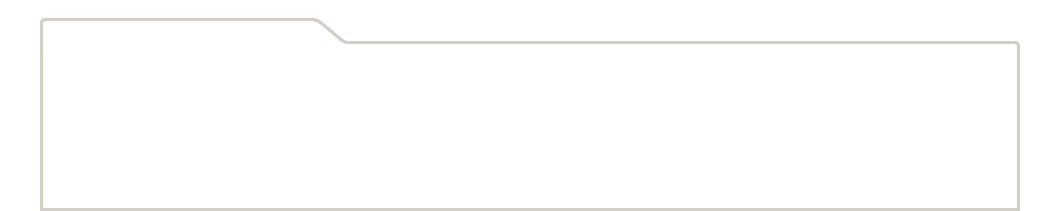
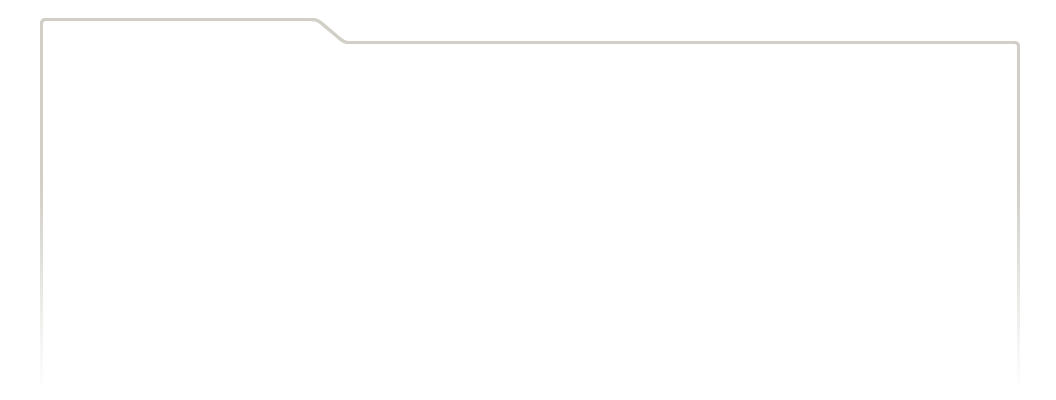
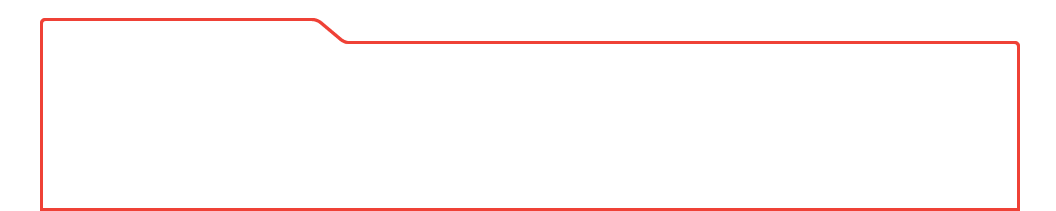
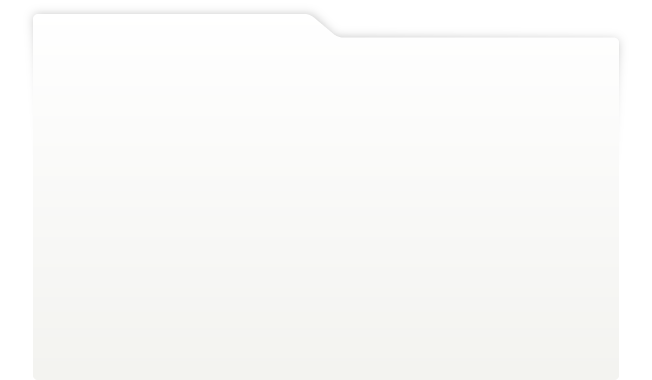
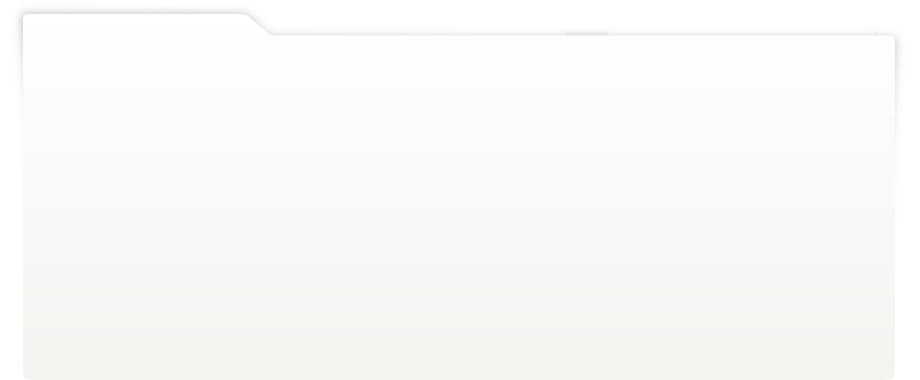
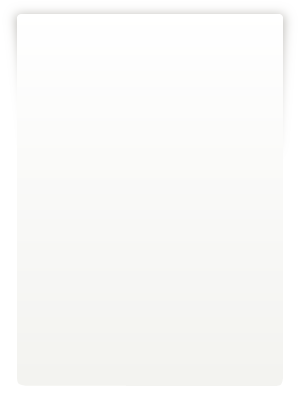
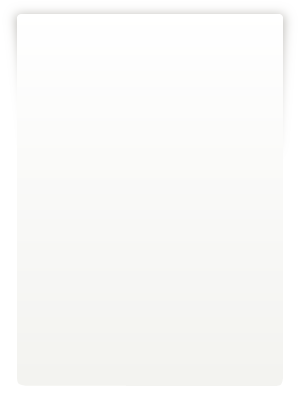
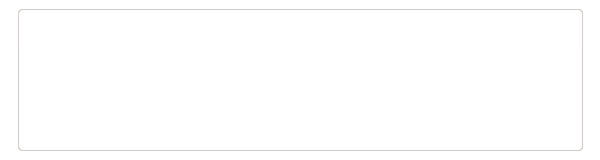
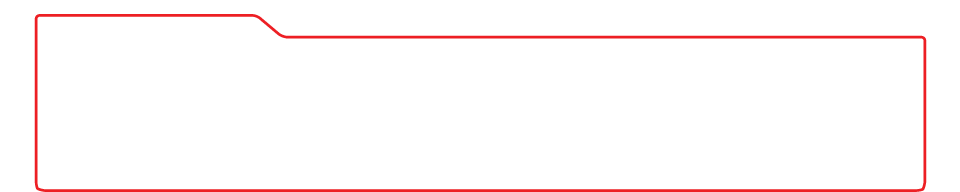
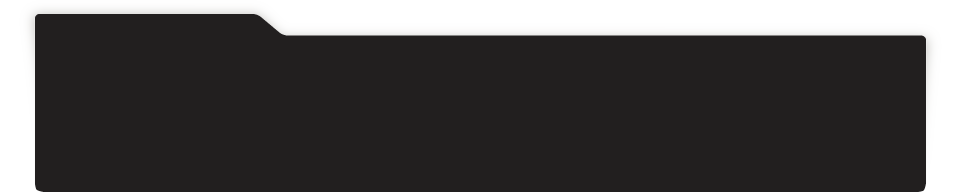
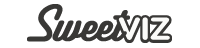
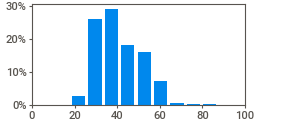
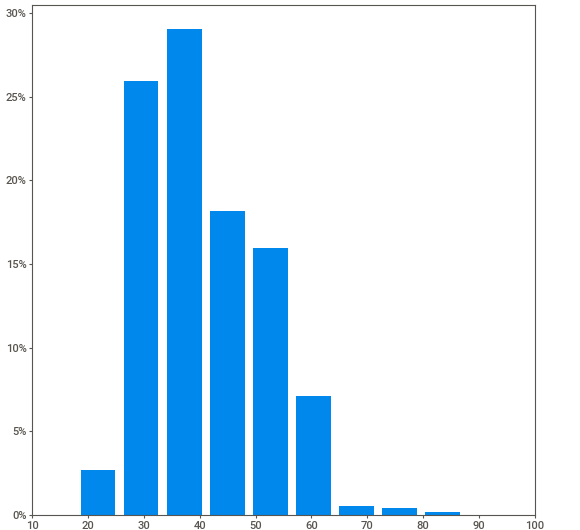
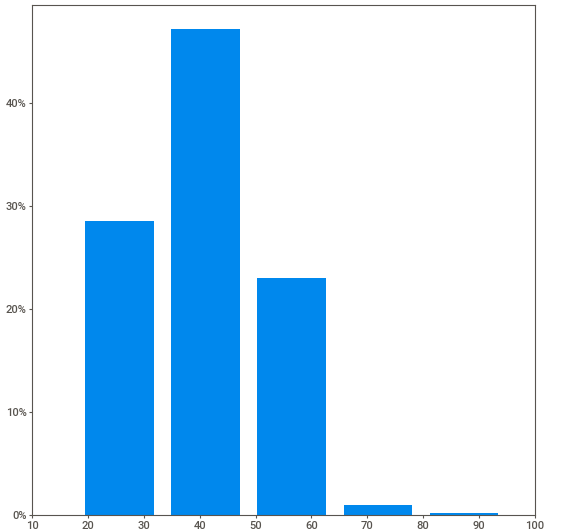
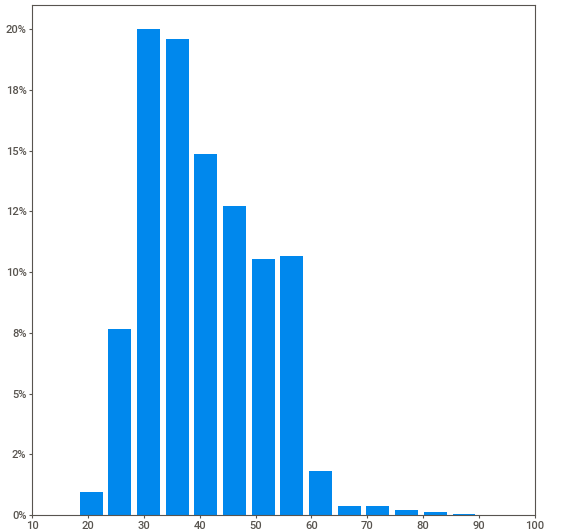
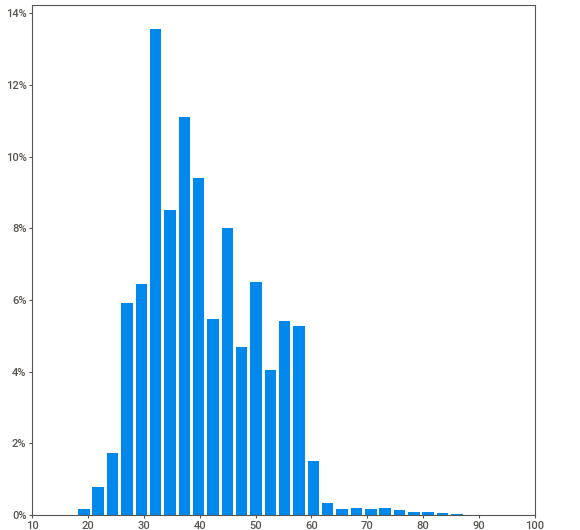
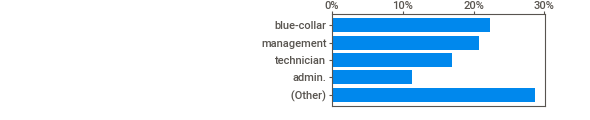
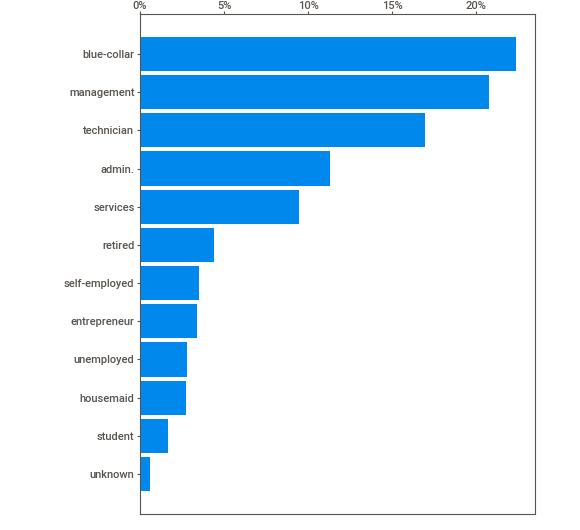
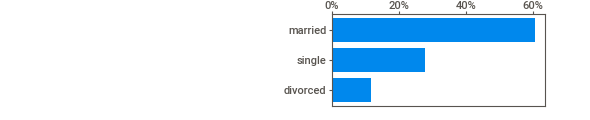
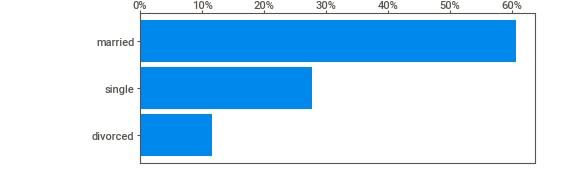
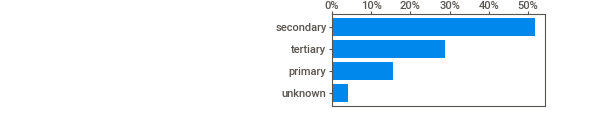
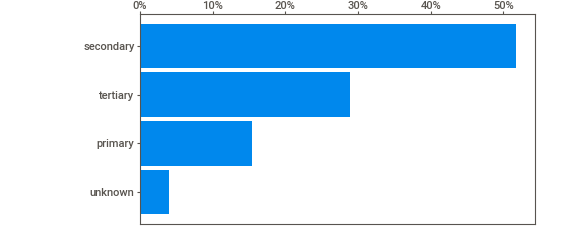
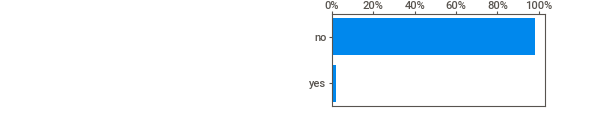
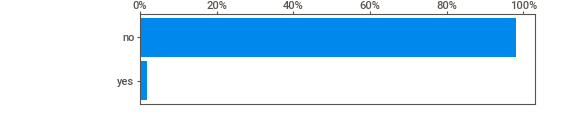
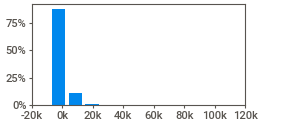
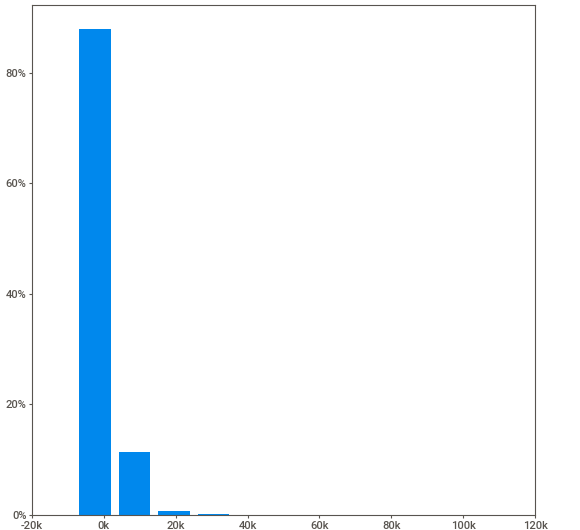
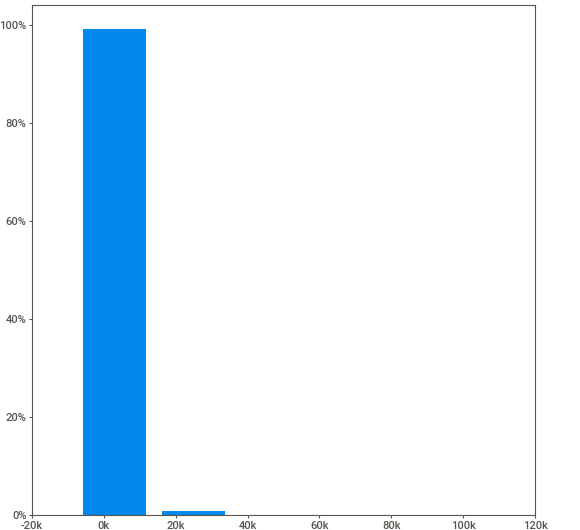
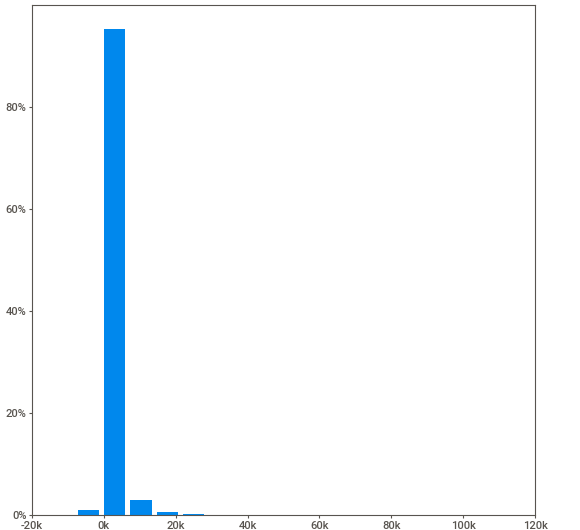
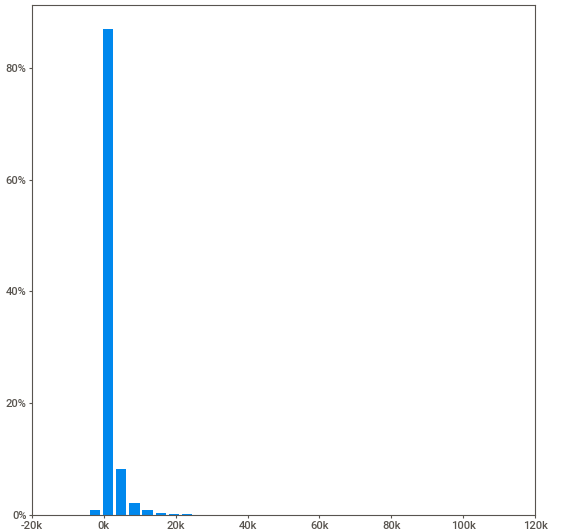
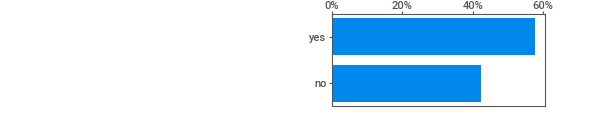
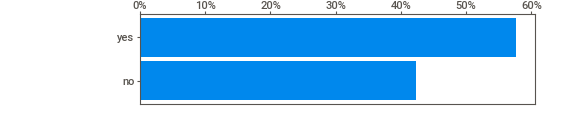
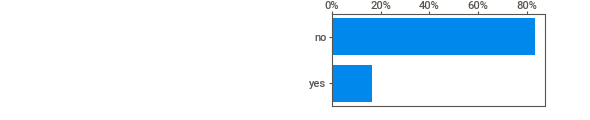
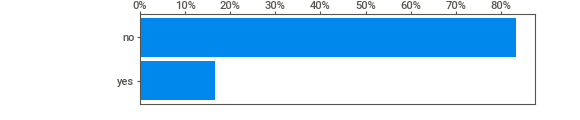
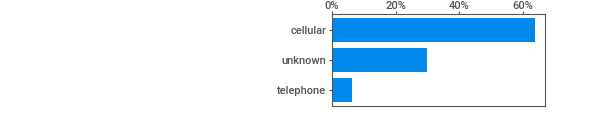
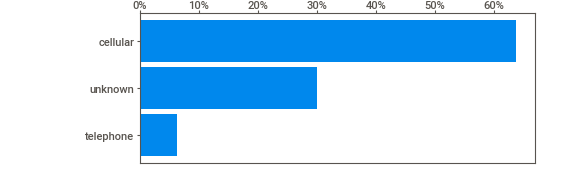
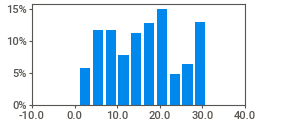
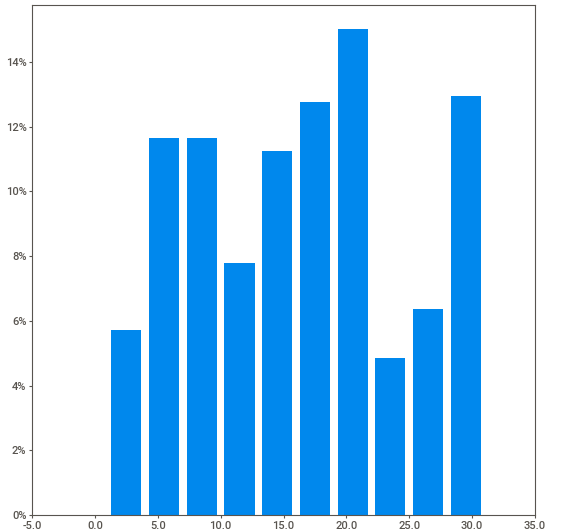
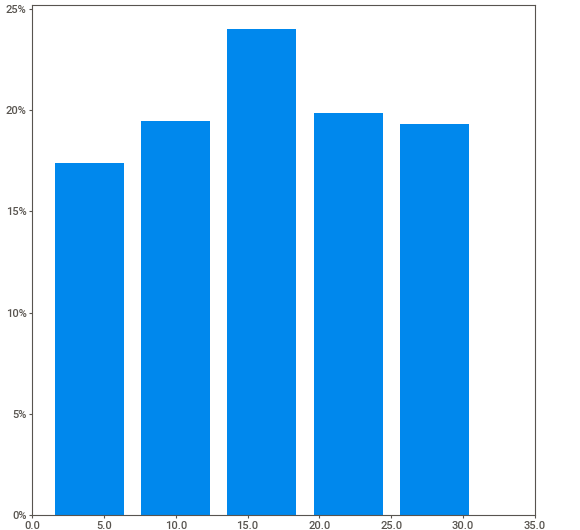
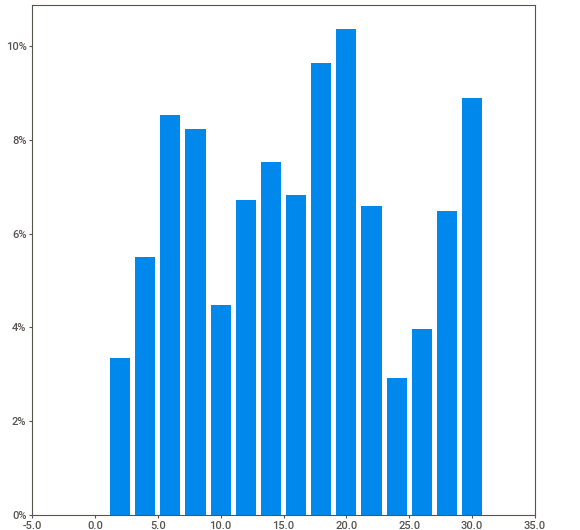
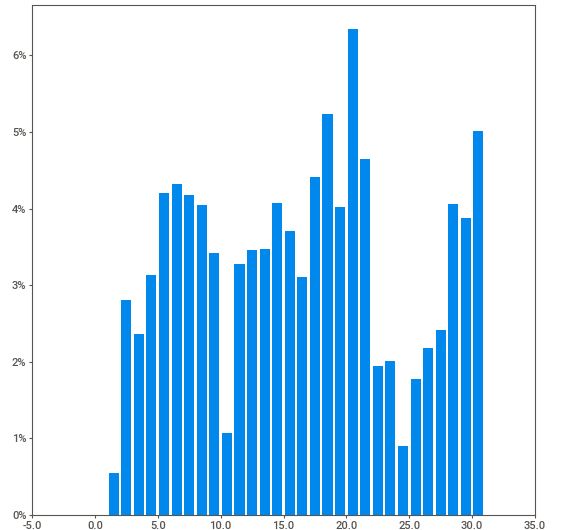
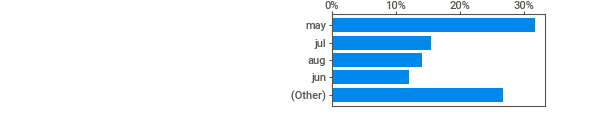
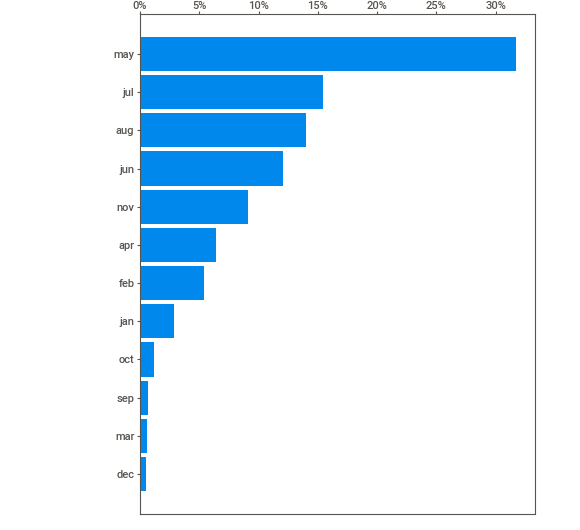
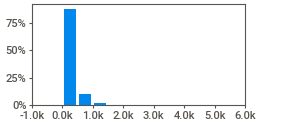
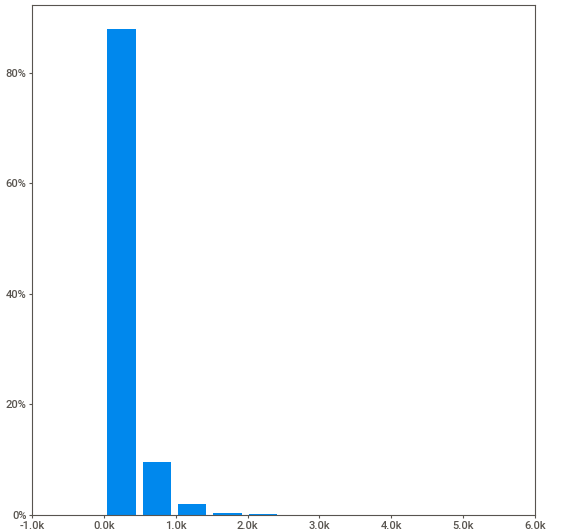
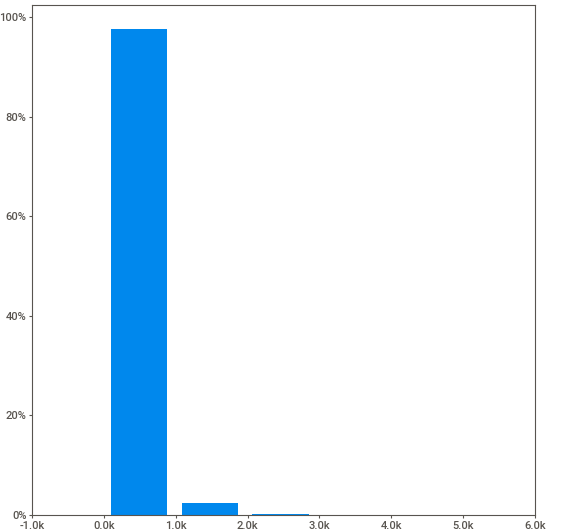
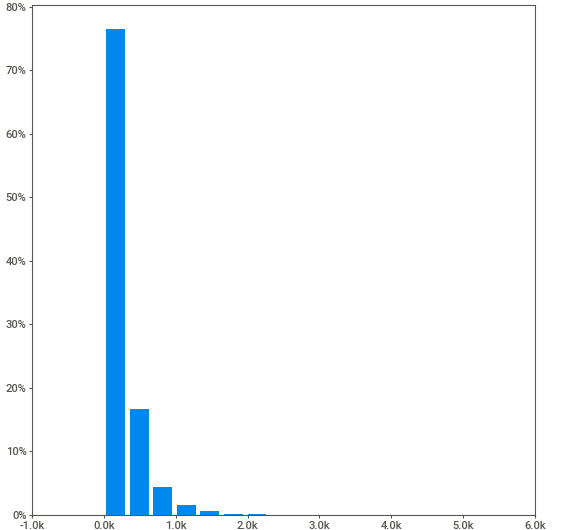
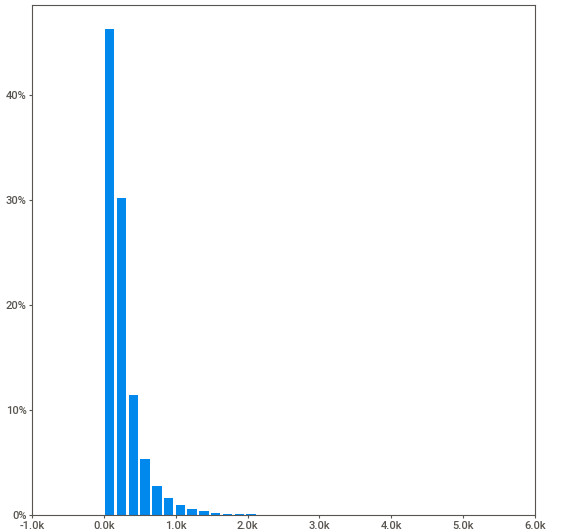
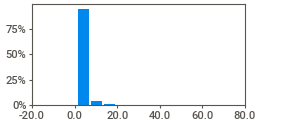
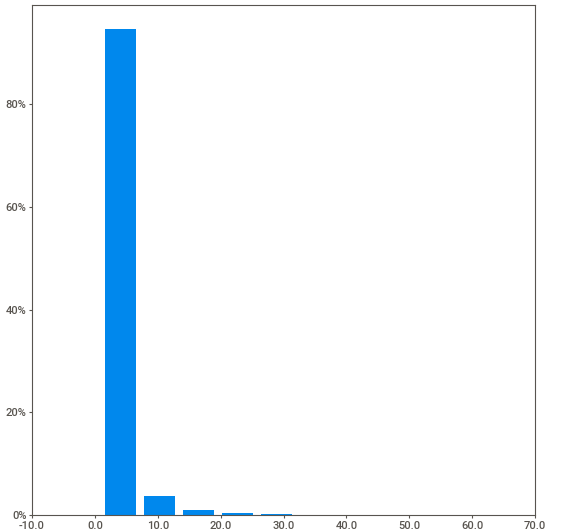
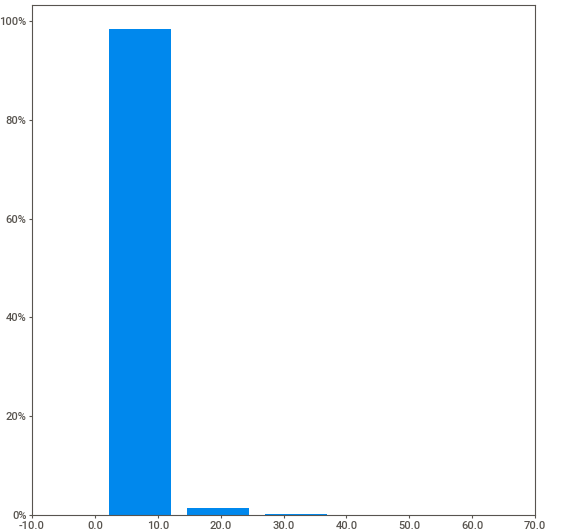
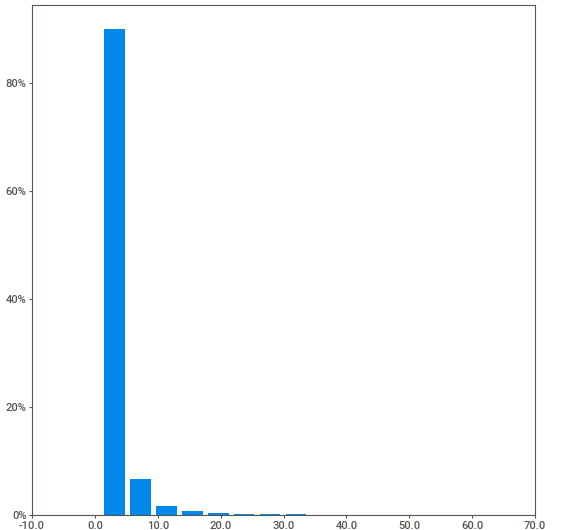
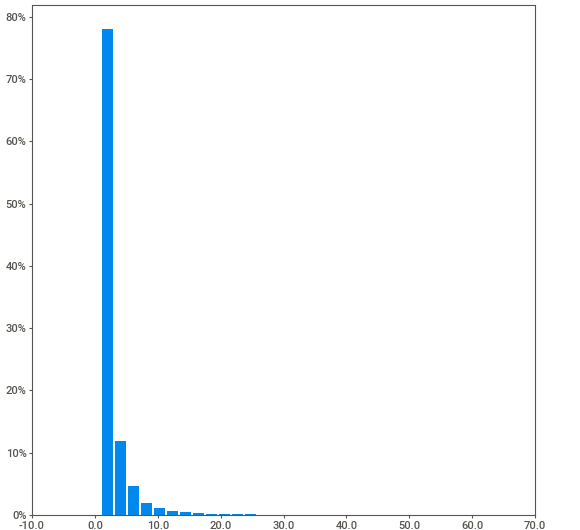
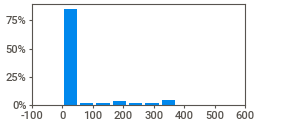
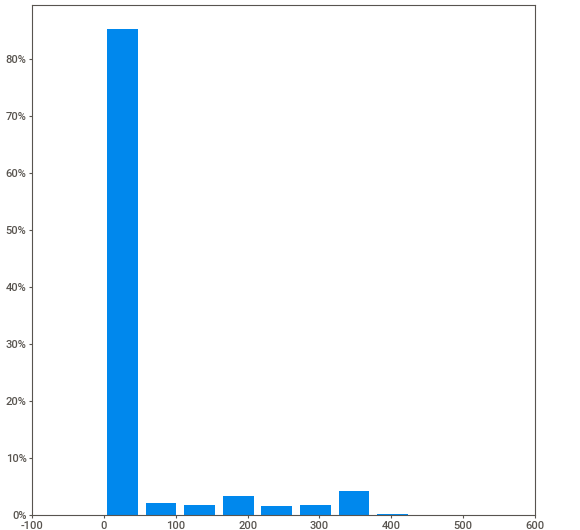
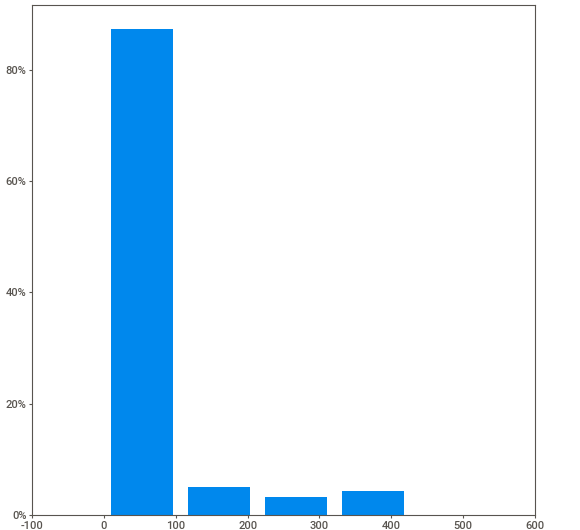
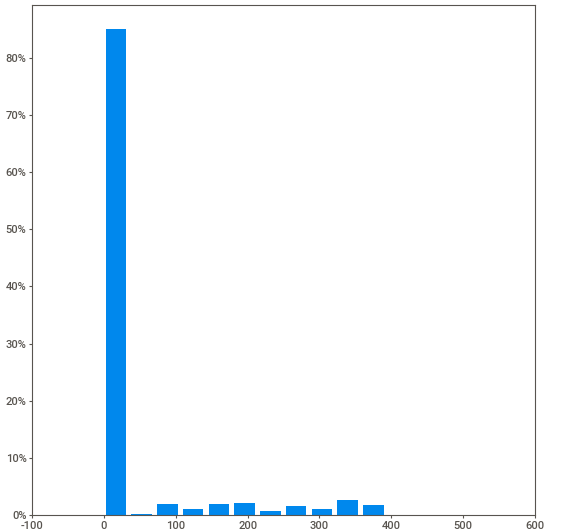
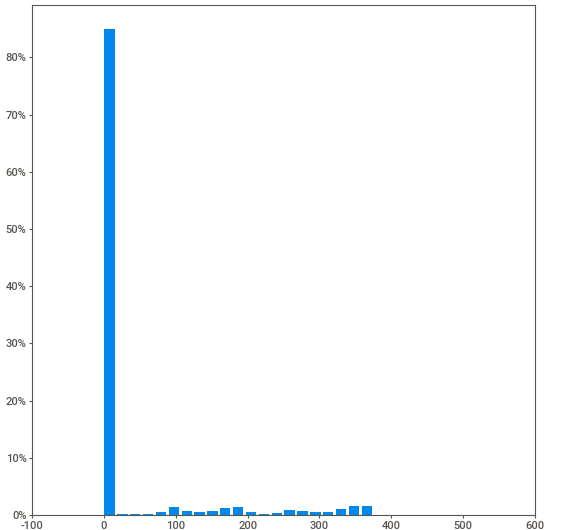
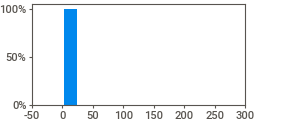
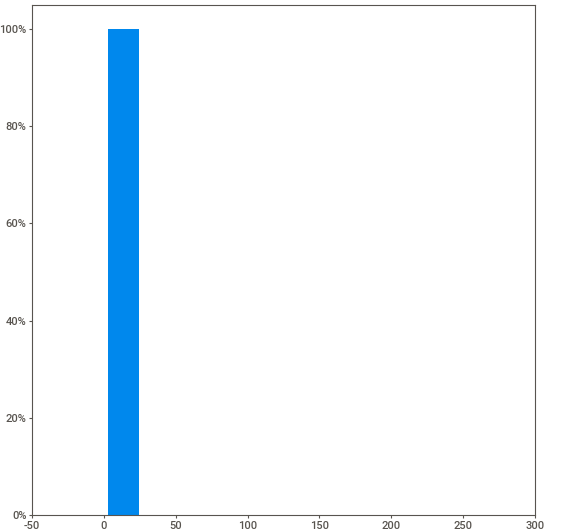
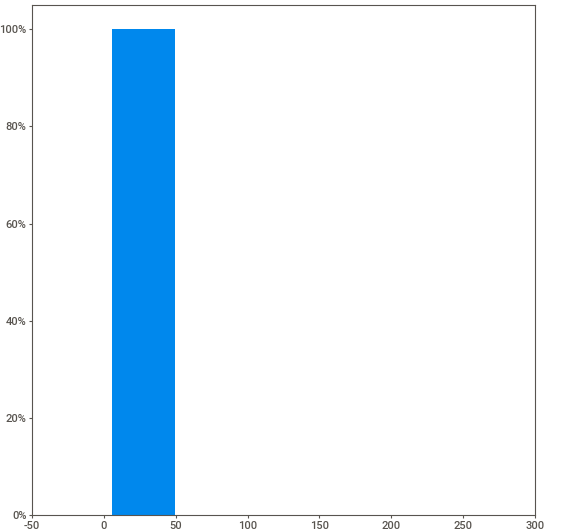
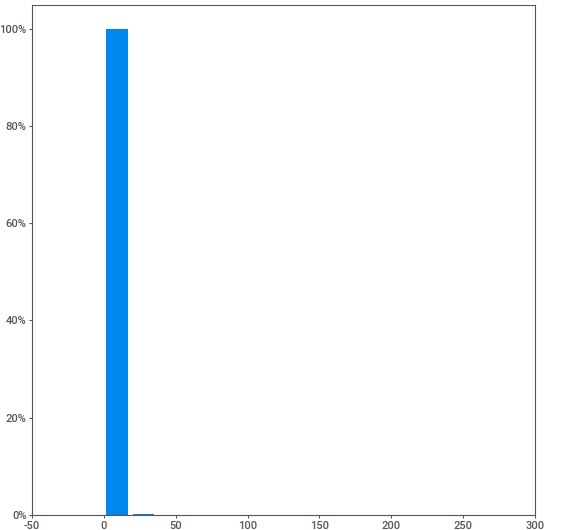
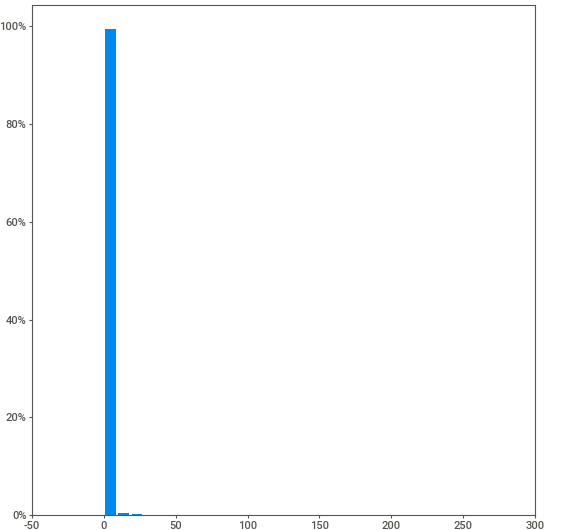
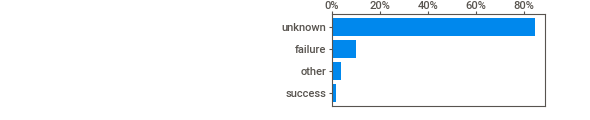
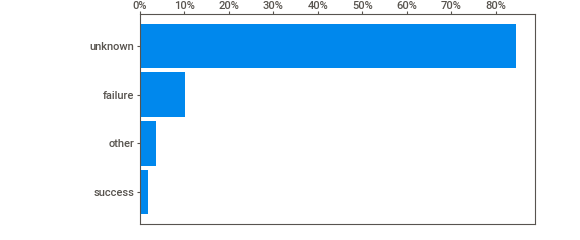
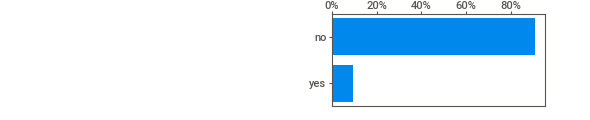
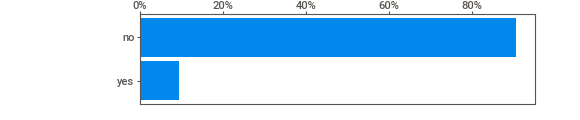
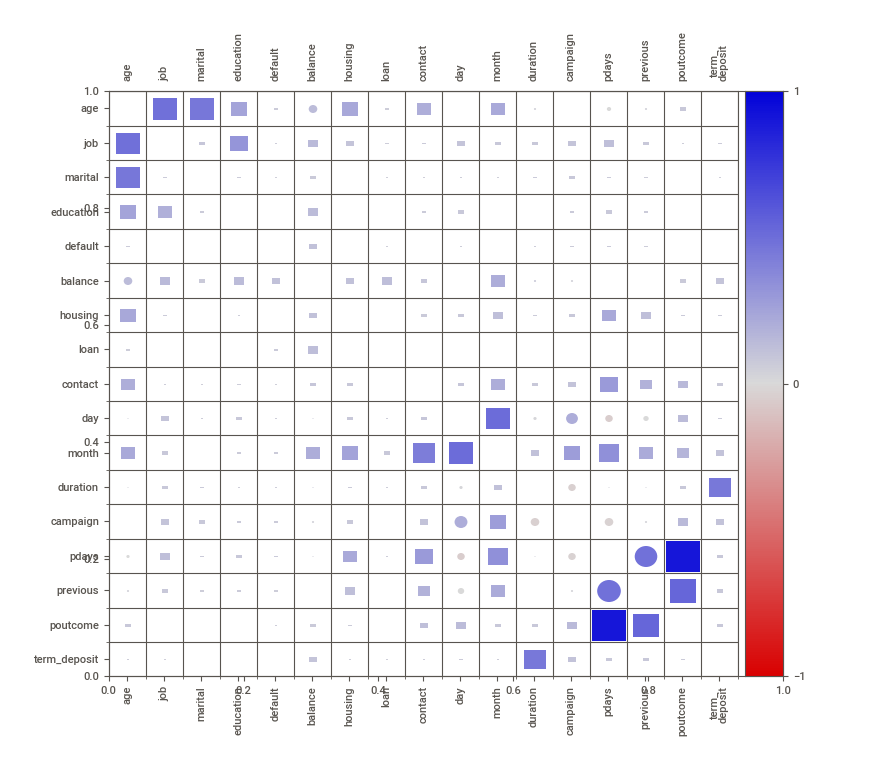
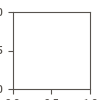

In [5]:
sw.analyze(bcd).show_notebook()

# queue_data.csv

In [14]:
qd = pd.read_csv('./datasets/queue_data.csv', dayfirst=True)
qd_time_length = qd.loc[:, ['wait_time', 'queue_length']]
qd_time_length.head()

,wait_time,queue_length
0,12.68,28
1,9.82,28
2,9.74,28
3,13.32,28
4,16.29,28


In [29]:
qd_time_length.corr()

,wait_time,queue_length
wait_time,1.000000,-0.056862
queue_length,-0.056862,1.000000


In [27]:
qd['start_day'] = pd.to_datetime(qd['start_time'].apply(lambda a: a.split(' ')[0])).dt.day
qd['start_month'] = pd.to_datetime(qd['start_time'].apply(lambda a: a.split(' ')[0])).dt.month
qd_d = qd.drop(['arrival_time', 'start_time', 'finish_time'], axis=1).sort_values('queue_length').reset_index()
qd_d.head()

C:\Users\Mike\AppData\Local\Temp\ipykernel_26812\1551101983.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  qd['start_day'] = pd.to_datetime(qd['start_time'].apply(lambda a: a.split(' ')[0])).dt.day
C:\Users\Mike\AppData\Local\Temp\ipykernel_26812\1551101983.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  qd['start_month'] = pd.to_datetime(qd['start_time'].apply(lambda a: a.split(' ')[0])).dt.month


,index,wait_time,queue_length,arrival_day,arrival_month,start_day,start_month
0,559,18.42,2,30,3,30,3
1,287,4.49,2,30,3,30,3
2,286,4.17,2,30,3,30,3
3,558,5.74,2,30,3,30,3
4,118,12.41,3,30,3,30,3


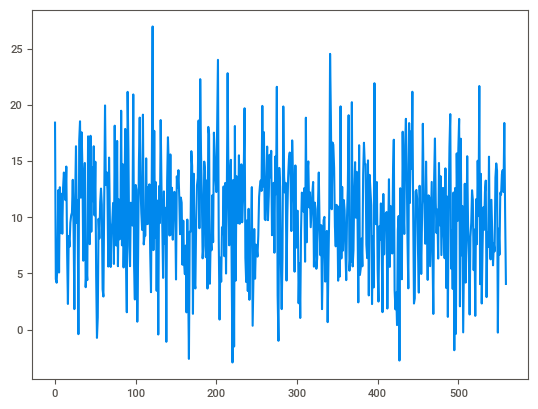

In [34]:
plt.plot(qd_d['wait_time'].to_numpy())

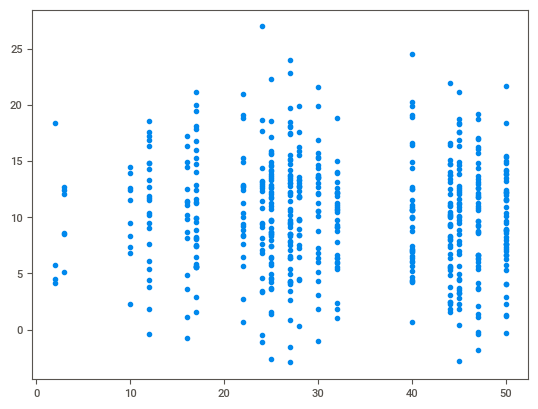

In [28]:
plt.plot(qd_d['queue_length'], qd_d['wait_time'], 'o')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



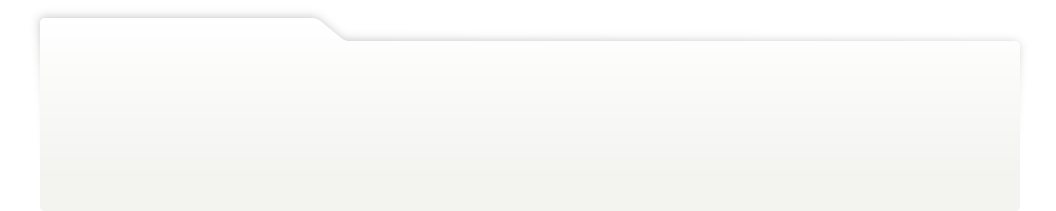
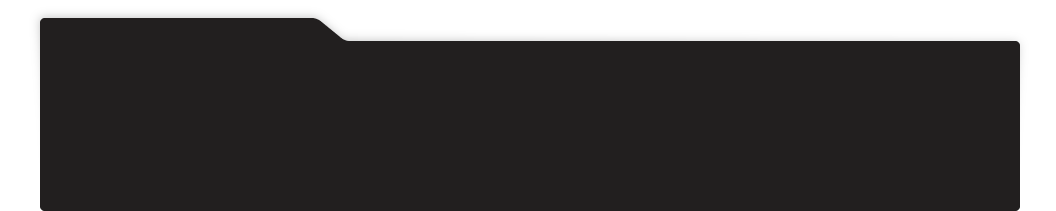
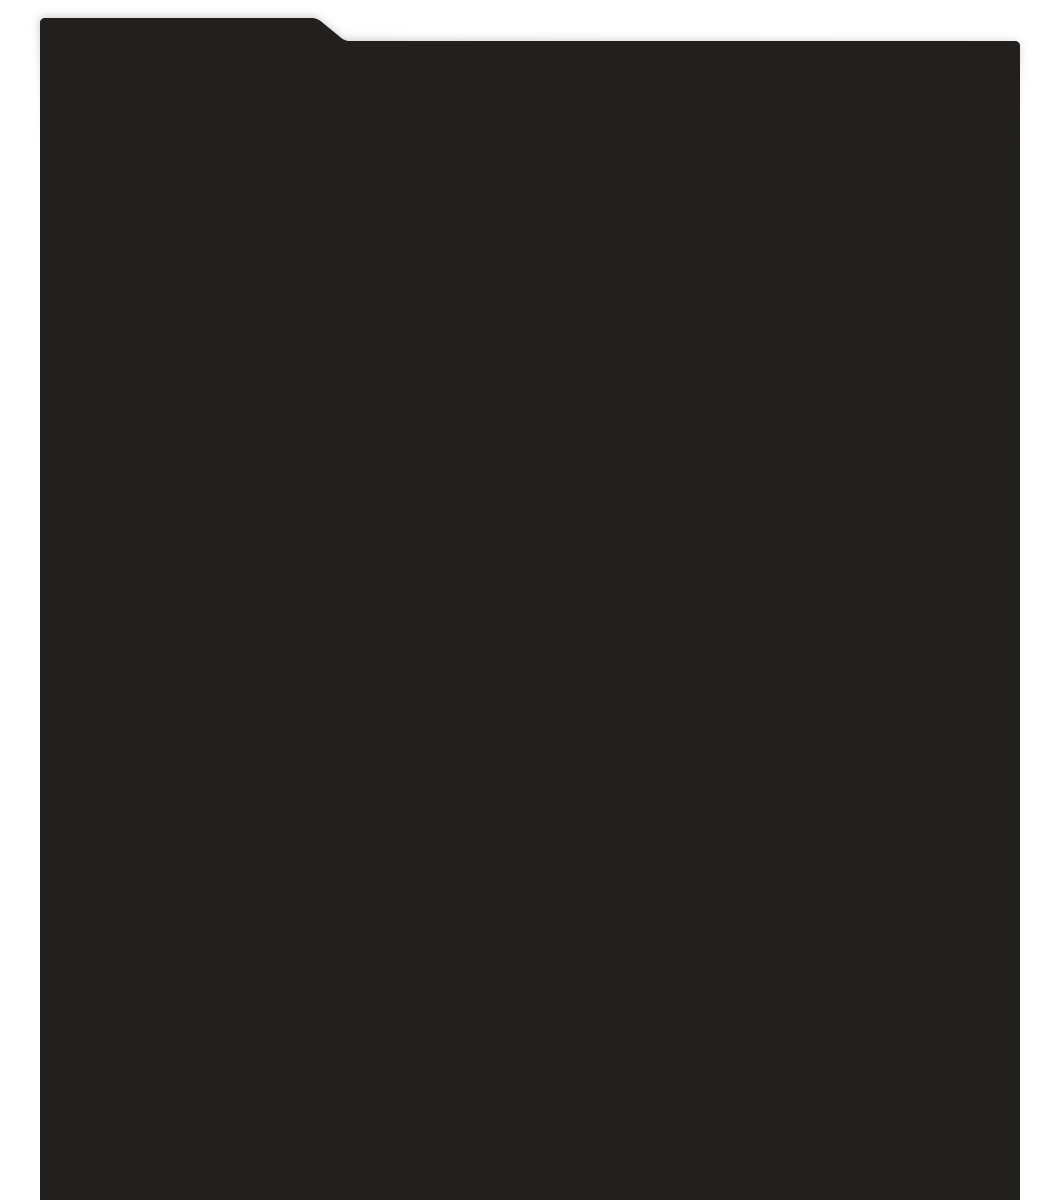
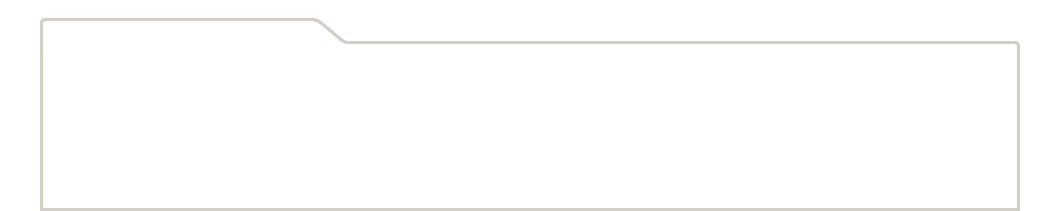
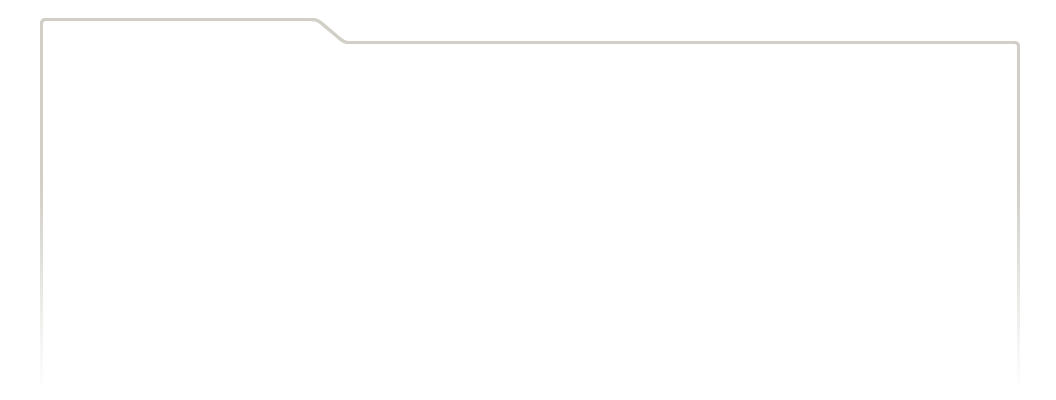
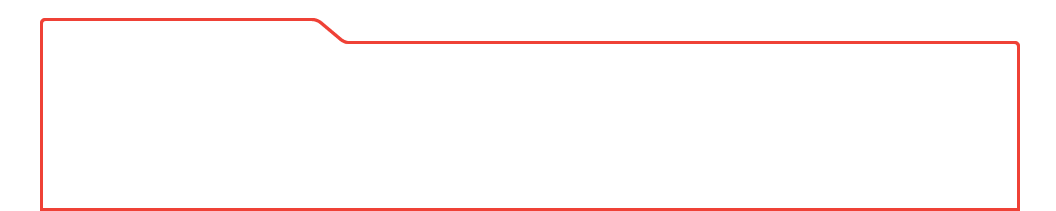
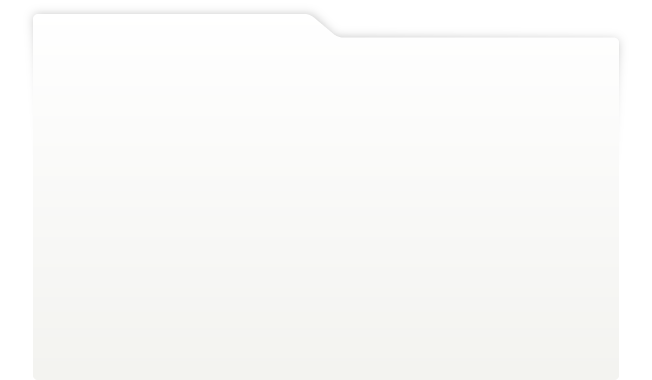
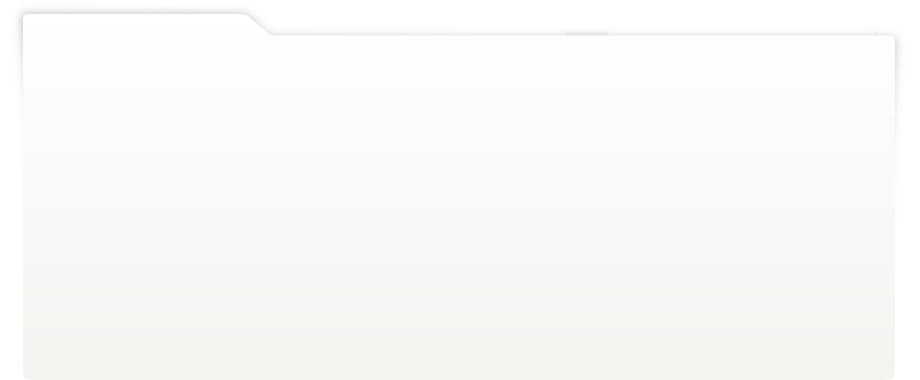
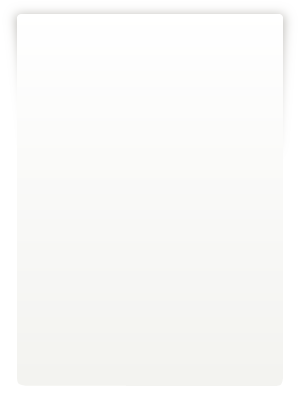
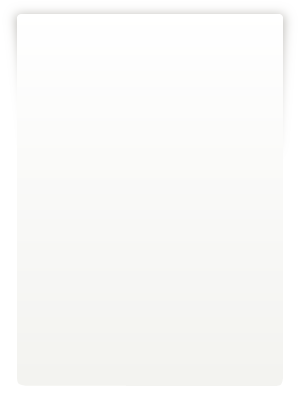
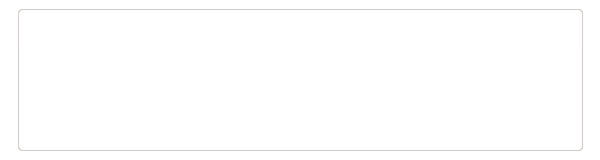
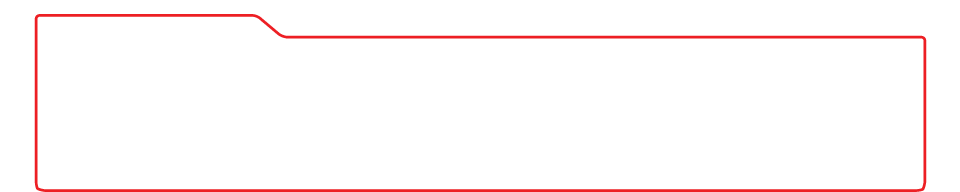
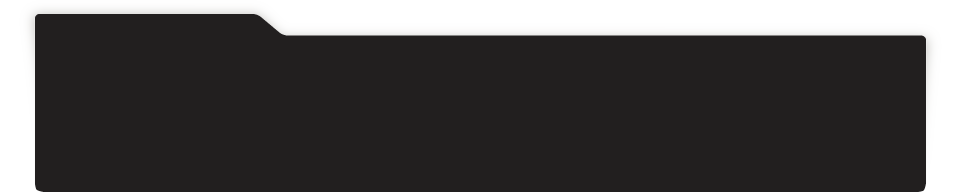
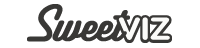
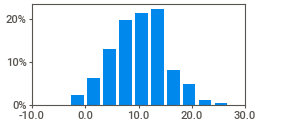
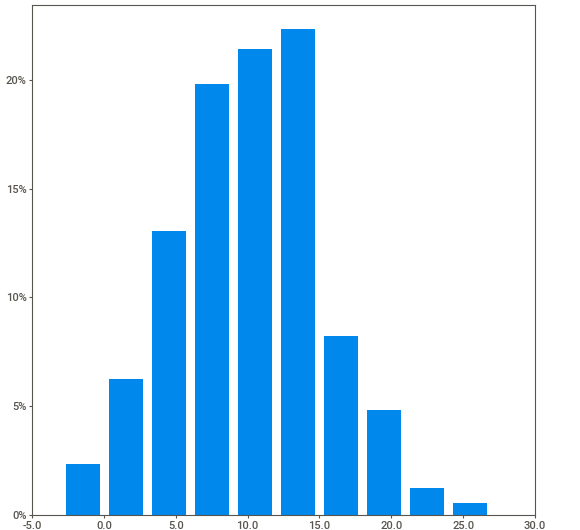
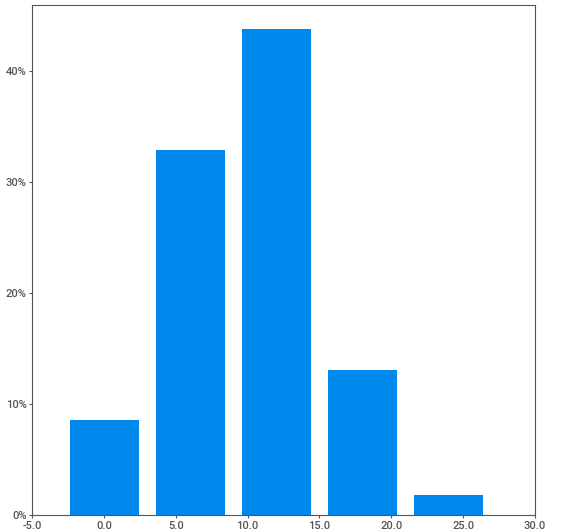
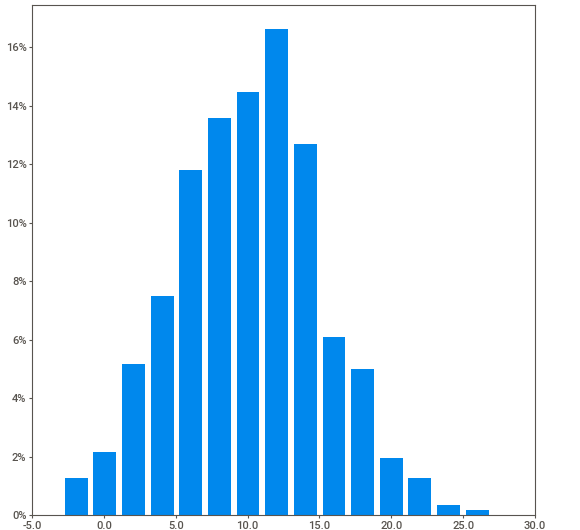
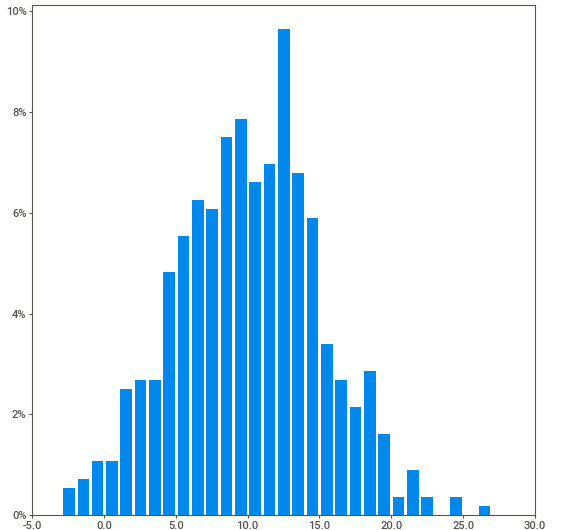
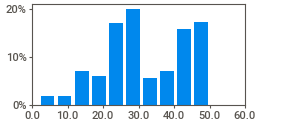
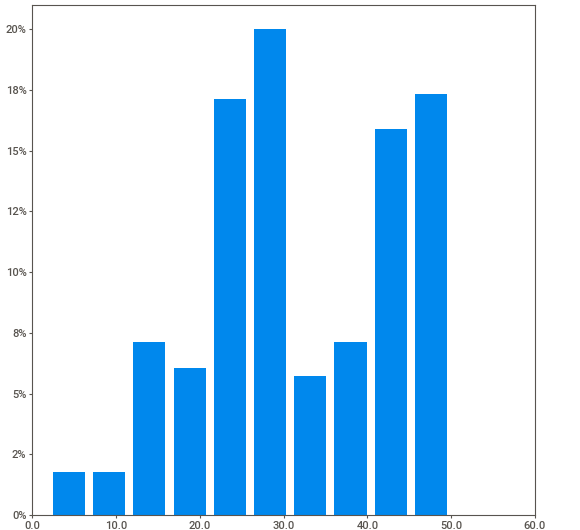
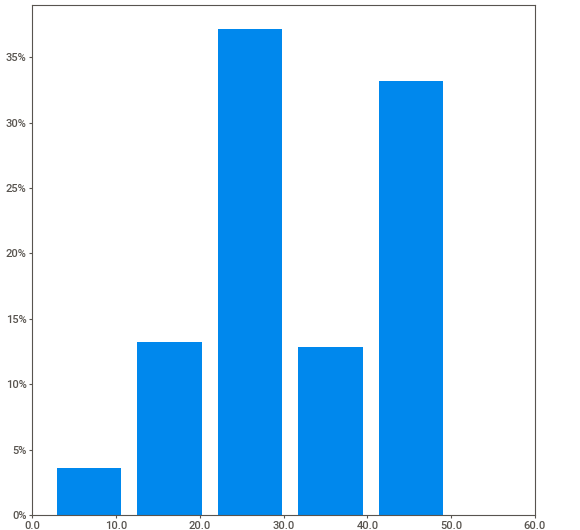
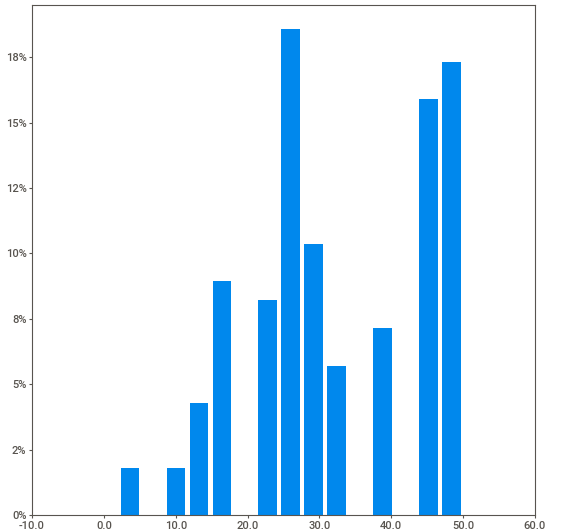
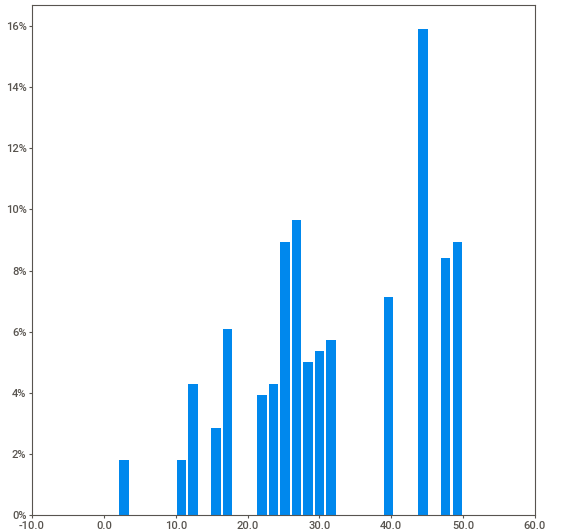
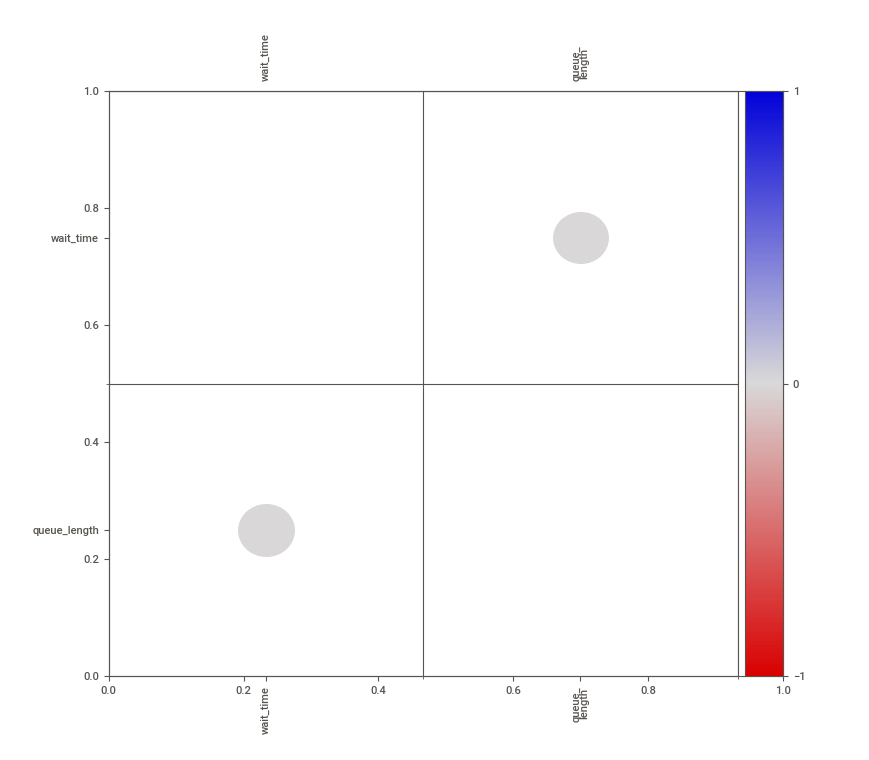
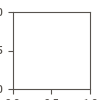

In [11]:
sw.analyze(qd_time_length).show_notebook()